In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

In [6]:
# LES (reference data) solutions 
################################

# https://turbmodels.larc.nasa.gov/Other_LES_Data/2Dhill_periodic/README_p_vel_and_turb_hill.txt
p001 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-001.dat')
p002 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-002.dat')
p003 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-003.dat')
p004 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-004.dat')
p005 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-005.dat')
p006 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-006.dat')
p007 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-007.dat')
p008 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-008.dat')
p009 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-009.dat')
p010 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-010.dat')

#path = '01_Data/Re_10595/UFR3-30TestCase/'
#REF  = []
#for f in range(1,10):
#    #print(f)
#    REF.append(np.loadtxt(path+'UFR3-30_C_10595_data_MB-00'+str(f)+'.dat'))
REF = [p001, p003, p004, p005, p006, p007, p008, p009, p010]

hill   = np.loadtxt('../02_Data/hill.txt')
CF     = np.loadtxt('../02_Data/CF1.dat')
Cf_ref = np.loadtxt('../02_Data//Re_10595/Cf_ref.dat')
Cf_dig = np.loadtxt('../02_Data/Cf_digitalized.dat')

# https://turbmodels.larc.nasa.gov/Other_LES_Data/2Dhill_periodic/hill_LES_cf_digitized.dat
points_Cf = np.loadtxt('../02_Data/points_Cf.H')

In [7]:
from scipy import interpolate
f = interpolate.interp1d(hill[:,0], hill[:,1])

xnew = points_Cf[2:73]
ynew = f(xnew) 
#print(xnew,ynew,ynew.shape)
#plt.plot(hill[:,0], hill[:,1], 'o', xnew, ynew, '-')
#plt.show()
znew = np.zeros(xnew.shape)

xyz = np.vstack((xnew, ynew, znew))
np.savetxt('../02_Data/x_y_z_Cf.H', xyz.T)

In [8]:
# Fabian results BSL
####################
path = '../04_Simulation/0.BASELINE/PH_2D_RANS_kOmegaSSTx_baseline/postProcessing/sets/20000/'
Fabian_BSL_U = []
Fabian_BSL_k = []
Fabian_BSL_R = []
for f in range(0,9):
    #print(f)
    Fabian_BSL_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    Fabian_BSL_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    #Fabian_BSL_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))
#Fabian_BSL_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [9]:
# Fabian results GEP
####################
path = '../04_Simulation/1.FROZEN/PH_2D_RANS_kOmegaSSTx_EVE-MO-57/postProcessing/sets/20000/'
Fabian_EVE_MO_57_U = []
Fabian_EVE_MO_57_k = []
Fabian_EVE_MO_57_R = []
for f in range(0,9):
    #print(f)
    Fabian_EVE_MO_57_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    Fabian_EVE_MO_57_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    #Fabian_EVE_MO_57_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))
#Fabian_EVE_MO_57_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [10]:
# Fabian results BEST
#####################
path = '../04_Simulation/0.BASELINE/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/8247/'
Fabian_best_U = []
Fabian_best_k = []
Fabian_best_R = []
for f in range(0,9):
    #print(f)
    Fabian_best_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    Fabian_best_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    #Fabian_best_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))
#Fabian_best_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [11]:
# Ali solutions BSL
###################
path = '../04_Simulation/0.BASELINE/PH_Cases/Mesh_120_by_130/steadyState_2D_Baseline_RANS_SST/postProcessing/sets/20000/'
Ali_BSL_U = []
Ali_BSL_k = []
Ali_BSL_R = []
for f in range(0,9):
    #print(f)
    Ali_BSL_U.append(np.loadtxt(path+'X_'+str(f)+'h_U.xy'))
    Ali_BSL_k.append(np.loadtxt(path+'X_'+str(f)+'h_k.xy'))
    Ali_BSL_R.append(np.loadtxt(path+'X_'+str(f)+'h_R.xy'))
Ali_BSL_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [12]:
# Ali solutions BSL 
###################
path = '../04_Simulation/0.BASELINE/PH_Cases/Mesh_120_by_130/Test_MHI_Fluent_MESH/steadyState_2D_Baseline_RANS_SST/postProcessing/sets/15000/'
Ali_BSL_fluent_U = []
Ali_BSL_fluent_k = []
Ali_BSL_fluent_R = []
for f in range(2,9,2):
    #print(f)
    Ali_BSL_fluent_U.append(np.loadtxt(path+'X_'+str(f)+'h_U.xy'))
    Ali_BSL_fluent_k.append(np.loadtxt(path+'X_'+str(f)+'h_k.xy'))
    Ali_BSL_fluent_R.append(np.loadtxt(path+'X_'+str(f)+'h_R.xy'))
#Ali_BSL_fluent_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [13]:
# Ali solutions GEP
###################
path = '../04_Simulation/0.BASELINE/PH_Cases/Mesh_120_by_130/Test_MHI_Fluent_MESH/steadyState_2D_GEP_RANS_Tr_R_BFS_Region_a5_k_froz_omega_froz_no_limiters_TestMHI_Mesh/postProcessing/sets/40000/'
Ali_GEP_U = []
Ali_GEP_k = []
Ali_GEP_R = []
for f in range(0,9):
    #print(f)
    Ali_GEP_U.append(np.loadtxt(path+'X_'+str(f)+'h_U.xy'))
    Ali_GEP_k.append(np.loadtxt(path+'X_'+str(f)+'h_k.xy'))
    Ali_GEP_R.append(np.loadtxt(path+'X_'+str(f)+'h_Rall_aijx.xy'))
Ali_GEP_Cf = pd.read_csv(path+'wallGradU0.csv')

In [14]:
# Lorenzo solutions BSL
#######################
path = '../03_Training/my_training_template_individual_jobs/running_pfac150_pop100_seed0/run_04949/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/6401/'
L_BSL_U = []
L_BSL_k = []
L_BSL_R = []
for f in range(0,9):
    #print(f)
    L_BSL_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    L_BSL_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    #L_BSL_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))
L_BSL_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [15]:
# Lorenzo solutions BSL (U,K,Cf training)
#########################################
#path = "../04_Simulation/PH_gen100_pop100_symUK-Cf_parIs/running_pfac150_pop100_seed0/run_01203/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/8225/"
path = "../04_Simulation/2.IN_THE_LOOP/PH_gen100_pop100_symUK-Cf_parIs/running_pfac150_pop100_seed0/run_03053/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/8177/"
L_UKCF_U = []
L_UKCF_k = []
L_UKCF_R = []
for f in range(0,9):
    #print(f)
    L_UKCF_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    L_UKCF_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    #L_UKCF_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))
L_UKCF_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [16]:
# Lorenzo solutions BSL (U,V,K training)
########################################
#path = "../04_Simulation/PH_gen100_pop100_symUVK_parIs/running_pfac150_pop100_seed0/run_02742/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/8252/"
path = "../04_Simulation/2.IN_THE_LOOP/PH_gen100_pop100_symUVK_parIs/running_pfac150_pop100_seed0/run_03404/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/8978/"
L_UVK_U = []
L_UVK_k = []
L_UVK_R = []
for f in range(0,9):
    #print(f)
    L_UVK_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    L_UVK_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    #L_UVK_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))
L_UVK_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [17]:
# Lorenzo solutions BSL (U,K, first and last profile only training)
###################################################################
path = "../04_Simulation/2.IN_THE_LOOP/PH_gen100_pop100_symUK_parIs_first_and_last_profiles/running_pfac150_pop100_seed0/run_04905/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/8426/"
L_UKfl_U = []
L_UKfl_k = []
L_UKfl_R = []
for f in range(0,9):
    #print(f)
    L_UKfl_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    L_UKfl_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    #L_UKfl_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))
L_UKfl_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [18]:
# Lorenzo solutions BSL (U,V,K first profile only training)
###########################################################
path = "../04_Simulation/2.IN_THE_LOOP/PH_gen100_pop100_symUVK_parIs_first_profile/running_pfac150_pop100_seed0/run_02101/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/7848/"
L_UVKf_U = []
L_UVKf_k = []
L_UVKf_R = []
for f in range(0,9):
    #print(f)
    L_UVKf_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    L_UVKf_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    #L_UVKf_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))
L_UVKf_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [19]:
# Lorenzo solutions BSL (U,K training)
#########################################
path = "../04_Simulation/2.IN_THE_LOOP/PH_gen100_pop100_symUK_parIs/running_pfac150_pop100_seed0/run_04956/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/8376/"
L_UK_U = []
L_UK_k = []
L_UK_R = []
for f in range(0,9):
    #print(f)
    L_UK_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    L_UK_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    #L_UK_R.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
L_UK_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [20]:
# Lorenzo solutions BSL kEpsilonPhitF (using Fabian test dir)
#####################################
#path = "../04_Simulation/PH_2D_RANS_kEpsilonPhitF_baseline/postProcessing/sampleDict/5000/"
#path = "../04_Simulation/PH_2D_RANS_kEpsilonPhitF_baseline/postProcessing/sampleDict/20000/"
path = "../04_Simulation/0.BASELINE/PH_2D_RANS_kEpsilonPhitF_baseline/postProcessing/sets/10000/"
L_kEpsilonPhitF_U = []
L_kEpsilonPhitF_k = []
L_kEpsilonPhitF_R = []
for f in range(0,9):
    #print(f)
    L_kEpsilonPhitF_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    L_kEpsilonPhitF_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    L_kEpsilonPhitF_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))
#L_kEpsilonPhitF_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

path = '../04_Simulation/0.BASELINE/PH_2D_RANS_v2f_baseline/postProcessing/sets/20000/'
L_v2f_U = []
L_v2f_k = []
L_v2f_R = []
for f in range(0,9):
    L_v2f_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    L_v2f_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    L_v2f_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))

In [21]:
# Lorenzo solutions BSL kEpsilon (using Ali test dir)
################################
path = "../04_Simulation/0.BASELINE/steadyState_2D_Baseline_RANS_kEpsilon/postProcessing/sets/20000/"
L_kEpsilon_U = []
L_kEpsilon_k = []
L_kEpsilon_R = []
for f in range(0,9):
    #print(f)
    L_kEpsilon_U.append(np.loadtxt(path+'X_'+str(f)+'h_U.xy'))
    L_kEpsilon_k.append(np.loadtxt(path+'X_'+str(f)+'h_k.xy'))
    L_kEpsilon_R.append(np.loadtxt(path+'X_'+str(f)+'h_R.xy'))
#L_kEpsilon_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [22]:
# Lorenzo solutions BSL kEpsilonPhitF (using Ali test dir)
#####################################
path = "../04_Simulation/0.BASELINE/steadyState_2D_Baseline_RANS_kEpsilonPhitF/postProcessing/sets/100000/"
Ali_kEpsilonPhitF_U = []
Ali_kEpsilonPhitF_k = []
Ali_kEpsilonPhitF_R = []
for f in range(1,9):
    #print(f)
    Ali_kEpsilonPhitF_U.append(np.loadtxt(path+'line_x'+str(f)+'_U.xy'))
    Ali_kEpsilonPhitF_k.append(np.loadtxt(path+'line_x'+str(f)+'_k.xy'))
    Ali_kEpsilonPhitF_R.append(np.loadtxt(path+'line_x'+str(f)+'_R.xy'))
#Ali_kEpsilonPhitF_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [23]:
# Lorenzo solutions BSL kEpsilonPhitF (using Ali test dir)
#####################################
path = "../04_Simulation/0.BASELINE/steadyState_2D_Baseline_RANS_kEpsilonPhitF/postProcessing/sets/180000/"
Ali2_kEpsilonPhitF_U = []
Ali2_kEpsilonPhitF_k = []
Ali2_kEpsilonPhitF_R = []
for f in range(0,9):
    #print(f)
    Ali2_kEpsilonPhitF_U.append(np.loadtxt(path+'X_'+str(f)+'h_U.xy'))
    Ali2_kEpsilonPhitF_k.append(np.loadtxt(path+'X_'+str(f)+'h_k.xy'))
    Ali2_kEpsilonPhitF_R.append(np.loadtxt(path+'X_'+str(f)+'h_R.xy'))
#Ali2_kEpsilonPhitF_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [24]:
# Lorenzo solutions BSL Spalart-Allmaras (using Ali test dir)
########################################
path = "../04_Simulation/0.BASELINE/steadyState_2D_Baseline_RANS_SpalartAllmaras/postProcessing/sets/30000/"
L_SA_U = []
L_SA_k = []
L_SA_R = []
for f in range(0,9):
    #print(f)
    L_SA_U.append(np.loadtxt(path+'X_'+str(f)+'h_U.xy'))
    #L_SA_k.append(np.loadtxt(path+'X_'+str(f)+'h_k.xy'))
    L_SA_R.append(np.loadtxt(path+'X_'+str(f)+'h_R.xy'))
#L_SA_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [25]:
# Lorenzo solutions BSL kEpsilon + RL (using Ali test dir) -- fucking shit -> need to re-train
#####################################
#path = "/home/unimelb.edu.au/lcampoli/AI/DSRRANS/turbulenceCases/testing/steadyState_2D_Baseline_RANS_kOmegaSST/postProcessing/sample/80000/"
#L_kEpsilon_RL_U = []
#L_kEpsilon_RL_k = []
#L_kEpsilon_RL_R = []
#for f in range(0,9):
#    #print(f)
#    L_kEpsilon_RL_U.append(np.loadtxt(path+'X_'+str(f)+'h_U.xy'))
#    L_kEpsilon_RL_k.append(np.loadtxt(path+'X_'+str(f)+'h_k.xy'))
#    #L_kEpsilon_RL_R.append(np.loadtxt(path+'X_'+str(f)+'h_R.xy'))
##L_kEpsilon_RL_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [26]:
# Lorenzo solutions BSL RNGkEpsilon (using Ali test dir)
###################################
path = "../04_Simulation/0.BASELINE/steadyState_2D_Baseline_RANS_RNGkEpsilon/postProcessing/sets/20000/"
L_RNGkEpsilon_U = []
L_RNGkEpsilon_k = []
L_RNGkEpsilon_R = []
for f in range(0,9):
    #print(f)
    L_RNGkEpsilon_U.append(np.loadtxt(path+'X_'+str(f)+'h_U.xy'))
    L_RNGkEpsilon_k.append(np.loadtxt(path+'X_'+str(f)+'h_k.xy'))
    L_RNGkEpsilon_R.append(np.loadtxt(path+'X_'+str(f)+'h_R.xy'))
#L_RNGkEpsilon_Cf = pd.read_csv(path+'Y0H_wallShearStress.csv')

In [27]:
path ='../04_Simulation/2.IN_THE_LOOP/PH_gen100_pop100_symUVKRxy_parIs/running_pfac150_pop100_seed0/run_04455/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/9343/'
L_kOmegaSST_UVKRxy_U = []
L_kOmegaSST_UVKRxy_k = []
L_kOmegaSST_UVKRxy_R = []
for f in range(0,9):
    L_kOmegaSST_UVKRxy_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    L_kOmegaSST_UVKRxy_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    L_kOmegaSST_UVKRxy_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))

# URANS

In [28]:
# URANS 
path = "../04_Simulation/0.BASELINE/PH_2D_RANS_kOmegaSSTx_baseline_pimpleURANS/postProcessing/sets/500/"
L_BSL_U_URANS = []
L_BSL_k_URANS = []
L_BSL_R_URANS = []
for f in range(0,9):
    #print(f)
    L_BSL_U_URANS.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    L_BSL_k_URANS.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    L_BSL_R_URANS.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))

In [29]:
# URANS Mesh_270_by_290
#path = "../04_Simulation/0.BASELINE/PH_2D_RANS_kOmegaSSTx_baseline_pimpleURANS_Mesh_270_by_290/postProcessing/sets/200/"
#path = "../04_Simulation/0.BASELINE/PH_2D_RANS_kOmegaSSTx_baseline_pimpleURANS_Mesh_270_by_290/postProcessing/sets/400/"
#path = "../04_Simulation/0.BASELINE/PH_2D_RANS_kOmegaSSTx_baseline_pimpleURANS_Mesh_270_by_290/postProcessing_NEW/sets/130/"
path = "../04_Simulation/0.BASELINE/PH_2D_RANS_kOmegaSSTx_baseline_pimpleURANS_Mesh_270_by_290/postProcessing_NEW/sets/1000/"
L_BSL_U_URANS_Mesh_270_by_290 = []
L_BSL_k_URANS_Mesh_270_by_290 = []
L_BSL_R_URANS_Mesh_270_by_290 = []
for f in range(0,9):
    #print(f)
    L_BSL_U_URANS_Mesh_270_by_290.append(pd.read_csv(path+'X'+str(f)+'H_U_UMean.csv'))
    L_BSL_k_URANS_Mesh_270_by_290.append(pd.read_csv(path+'X'+str(f)+'H_k_kMean_pPrime2Mean_kPrime2Mean_nutMean_pMean.csv'))
    #L_BSL_R_URANS_Mesh_270_by_290.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))

In [30]:
# URANS Mesh_270_by_290
path = "../04_Simulation/0.BASELINE/PH_2D_RANS_v2f_baseline_pimpleURANS/postProcessing/sets/400/"
L_BSL_U_URANS_v2f = []
L_BSL_k_URANS_v2f = []
L_BSL_R_URANS_v2f = []
for f in range(0,9):
    #print(f)
    L_BSL_U_URANS_v2f.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    L_BSL_k_URANS_v2f.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    L_BSL_R_URANS_v2f.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))

In [31]:
path ='../04_Simulation/0.BASELINE/PH_2D_RANS_kOmegaSSTx_baseline_pimpleURANS_Mesh_540_by_590/postProcessing/sets/70/'
L_kOmegaSST_BSL_540_x_590_U = []
L_kOmegaSST_BSL_540_x_590_k = []
L_kOmegaSST_BSL_540_x_590_R = []
for f in range(0,9):
    L_kOmegaSST_BSL_540_x_590_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    L_kOmegaSST_BSL_540_x_590_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    L_kOmegaSST_BSL_540_x_590_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))

In [32]:
#path = '../04_Simulation/PH_2D_kOmegaSSTx_GEP_LAV_pimpleURANS_270x290_aij_xt/postProcessing/sets/53.015/'
#path = '../04_Simulation/PH_2D_kOmegaSSTx_GEP_LAV_pimpleURANS_540x590_aij_xt/postProcessing/sets/7/'
#path = '../04_Simulation/PH_2D_kOmegaSSTx_GEP_LAV_pimpleURANS_540x590_aij_xt/postProcessing/sets/32/'
#path = '../04_Simulation/PH_2D_kOmegaSSTx_GEP_LAV_pimpleURANS_540x590_aij_xt/postProcessing/sets/46/'
#path = '../04_Simulation/PH_2D_kOmegaSSTx_GEP_LAV_pimpleURANS_540x590_aij_xt/postProcessing/sets/61/'
#path = '../04_Simulation/PH_2D_kOmegaSSTx_GEP_LAV_pimpleURANS_540x590_aij_xt/postProcessing/sets/106/'
#path = '../04_Simulation/PH_2D_kOmegaSSTx_GEP_LAV_pimpleURANS_540x590_aij_xt/postProcessing/sets/265/'
#path = '../04_Simulation/PH_2D_kOmegaSSTx_GEP_LAV_pimpleURANS_540x590_aij_xt/postProcessing/sets/500/'
path = '../04_Simulation/1.FROZEN/PH_2D_kOmegaSSTx_GEP_LAV_pimpleURANS_540x590_aij_xt/postProcessing/sets/1000/'
L_kOmegaSST_LAV_540x590_U = []
L_kOmegaSST_LAV_540x590_k = []
L_kOmegaSST_LAV_540x590_R = []
for f in range(0,9):
    #L_kOmegaSST_LAV_540x590_U.append(pd.read_csv(path+'X'+str(f)+'H_U_UMean.csv'))
    #L_kOmegaSST_LAV_540x590_k.append(pd.read_csv(path+'X'+str(f)+'H_k_kMean_pPrime2Mean_kPrime2Mean_nutMean_pMean.csv'))
    L_kOmegaSST_LAV_540x590_U.append(pd.read_csv(path+'X'+str(f)+'H_U_UMean.csv'))
    L_kOmegaSST_LAV_540x590_k.append(pd.read_csv(path+'X'+str(f)+'H_k_kMean.csv'))
    #L_kOmegaSST_LAV_540x590_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))    

In [33]:
# URANS Mesh_270_by_290 LAV model
path = "../04_Simulation/1.FROZEN/PH_2D_kOmegaSSTx_GEP_LAV_pimpleURANS_270x290_aij_xt/postProcessing/sets/993/"
L_kOmegaSST_LAV_240x290_U = []
L_kOmegaSST_LAV_240x290_k = []
L_kOmegaSST_LAV_240x290_R = []
for f in range(0,9):
    #print(f)
    L_kOmegaSST_LAV_240x290_U.append(pd.read_csv(path+'X'+str(f)+'H_U_UMean.csv'))
    L_kOmegaSST_LAV_240x290_k.append(pd.read_csv(path+'X'+str(f)+'H_k_kMean_pPrime2Mean_kPrime2Mean_nutMean_pMean.csv'))
    #L_kOmegaSST_LAV_240x290_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))    

In [34]:
# URANS Mesh_270_by_290 with the best frozen model of Lav for the BOR
path = "../04_Simulation/1.FROZEN/PH_2D_RANS_kOmegaSSTx_GEP_pimpleURANS_Mesh_270_by_290_Chitrarth_Lav/postProcessing/sampleDict/240/"
L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav = []
L_BSL_k_URANS_Mesh_270_by_290_Chitrarth_Lav = []
L_BSL_R_URANS_Mesh_270_by_290_Chitrarth_Lav = []
for f in range(0,9):
    #print(f)
    L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav.append(pd.read_csv(path+'X'+str(f)+'H_U_UMean.csv'))
    L_BSL_k_URANS_Mesh_270_by_290_Chitrarth_Lav.append(pd.read_csv(path+'X'+str(f)+'H_k_kMean_pPrime2Mean_kPrime2Mean_nutMean_pMean.csv'))
    #L_BSL_R_URANS_Mesh_270_by_290_Chitrarth_Lav.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))    

In [35]:
# 3D BSL RANS Mesh_270_by_290
path = "../04_Simulation/0.BASELINE/PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290/postProcessing/sets/20000/"
L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_U = []
L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_k = []
L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_R = []
for f in range(0,9):
    #print(f)
    #L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_U.append(np.loadtxt(path+'X_'+str(f)+'h_U.xy'))
    #L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_k.append(np.loadtxt(path+'X_'+str(f)+'h_k.xy'))
    #L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_R.append(np.loadtxt(path+'X_'+str(f)+'h_R.xy'))  
    L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))    

# URANS 3D

In [36]:
path = "../04_Simulation/1.FROZEN/PH_3D_kOmegaSSTx_GEP_URANS_Mesh_270_by_290_model_aij_xt/postProcessing/sets/198/"
#path = "../04_Simulation/1.FROZEN/PH_3D_kOmegaSSTx_GEP_URANS_Mesh_270_by_290_model_aij_xt/postProcessing/sets/628/"
old_L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U = []
old_L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_k = []
old_L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_R = []
for f in range(0,9):
    #print(f)
    old_L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U.append(np.loadtxt(path+'X'+str(f)+'H_U_UMean.xy'))
    old_L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_k.append(np.loadtxt(path+'X'+str(f)+'H_k_kMean_pPrime2Mean_kPrime2Mean_nutMean_pMean.xy'))
    old_L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_R.append(np.loadtxt(path+'X'+str(f)+'H_R_Rall_UPrime2Mean.xy'))  
    #L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    #L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    #L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))   

In [37]:
#path = "../04_Simulation/1.FROZEN/PH_3D_kOmegaSSTx_GEP_URANS_Mesh_270_by_290_model_aij_xt/postProcessing/sets/198/"
#path = "../04_Simulation/1.FROZEN/PH_3D_kOmegaSSTx_GEP_URANS_Mesh_270_by_290_model_aij_xt/postProcessing/sets/628/"
path = "../04_Simulation/1.FROZEN/PH_3D_kOmegaSSTx_GEP_URANS_Mesh_270_by_290_model_aij_xt/postProcessing/sets/1528/"
L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U = []
L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_k = []
L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_R = []
for f in range(0,9):
    #print(f)
    L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U.append(np.loadtxt(path+'X'+str(f)+'H_U_UMean.xy'))
    L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_k.append(np.loadtxt(path+'X'+str(f)+'H_k_kMean_pPrime2Mean_kPrime2Mean_nutMean_pMean.xy'))
    L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_R.append(np.loadtxt(path+'X'+str(f)+'H_Rall_UPrime2Mean.xy'))  
    #L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    #L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    #L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))    

In [38]:
path = "../04_Simulation/0.BASELINE/PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290/postProcessing/sets/49/"
L_PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290_U = []
L_PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290_k = []
L_PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290_R = []
for f in range(0,9):
    #print(f)
    L_PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290_U.append(np.loadtxt(path+'X'+str(f)+'H_U_UMean.xy'))
    L_PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290_k.append(np.loadtxt(path+'X'+str(f)+'H_k_kMean_pPrime2Mean_kPrime2Mean_nutMean_pMean.xy'))
    #L_PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290_R.append(np.loadtxt(path+'X'+str(f)+'H_R_Rall_UPrime2Mean.xy'))  
    #L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_U.append(pd.read_csv(path+'X'+str(f)+'H_U.csv'))
    #L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_k.append(pd.read_csv(path+'X'+str(f)+'H_k.csv'))
    #L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_R.append(pd.read_csv(path+'X'+str(f)+'H_R.csv'))    

# Trained on DNS data

In [39]:
path = "../04_Simulation/2.IN_THE_LOOP/PH_velocity_reynolds_stress_I1_I2_MAPE_C1_C2_12_100_DNS_profiles/running_pfac150_pop12_seed0/run_best/case_1p0_refined_kOmegaSST_OF7/postProcessing/sampleDict/20000/"
PH_velocity_reynolds_stress_I1_I2_MAPE_C1_C2_12_100_DNS_profiles_U = []
PH_velocity_reynolds_stress_I1_I2_MAPE_C1_C2_12_100_DNS_profiles_k = []
PH_velocity_reynolds_stress_I1_I2_MAPE_C1_C2_12_100_DNS_profiles_R = []
for f in range(0,9):
    PH_velocity_reynolds_stress_I1_I2_MAPE_C1_C2_12_100_DNS_profiles_U.append(np.loadtxt(path+'line_x'+str(f)+'_U.xy'))
    #PH_velocity_reynolds_stress_I1_I2_MAPE_C1_C2_12_100_DNS_profiles_k.append(np.loadtxt(path+'line_x'+str(f)+'_k.xy'))
    PH_velocity_reynolds_stress_I1_I2_MAPE_C1_C2_12_100_DNS_profiles_R.append(np.loadtxt(path+'line_x'+str(f)+'_Rall.xy'))

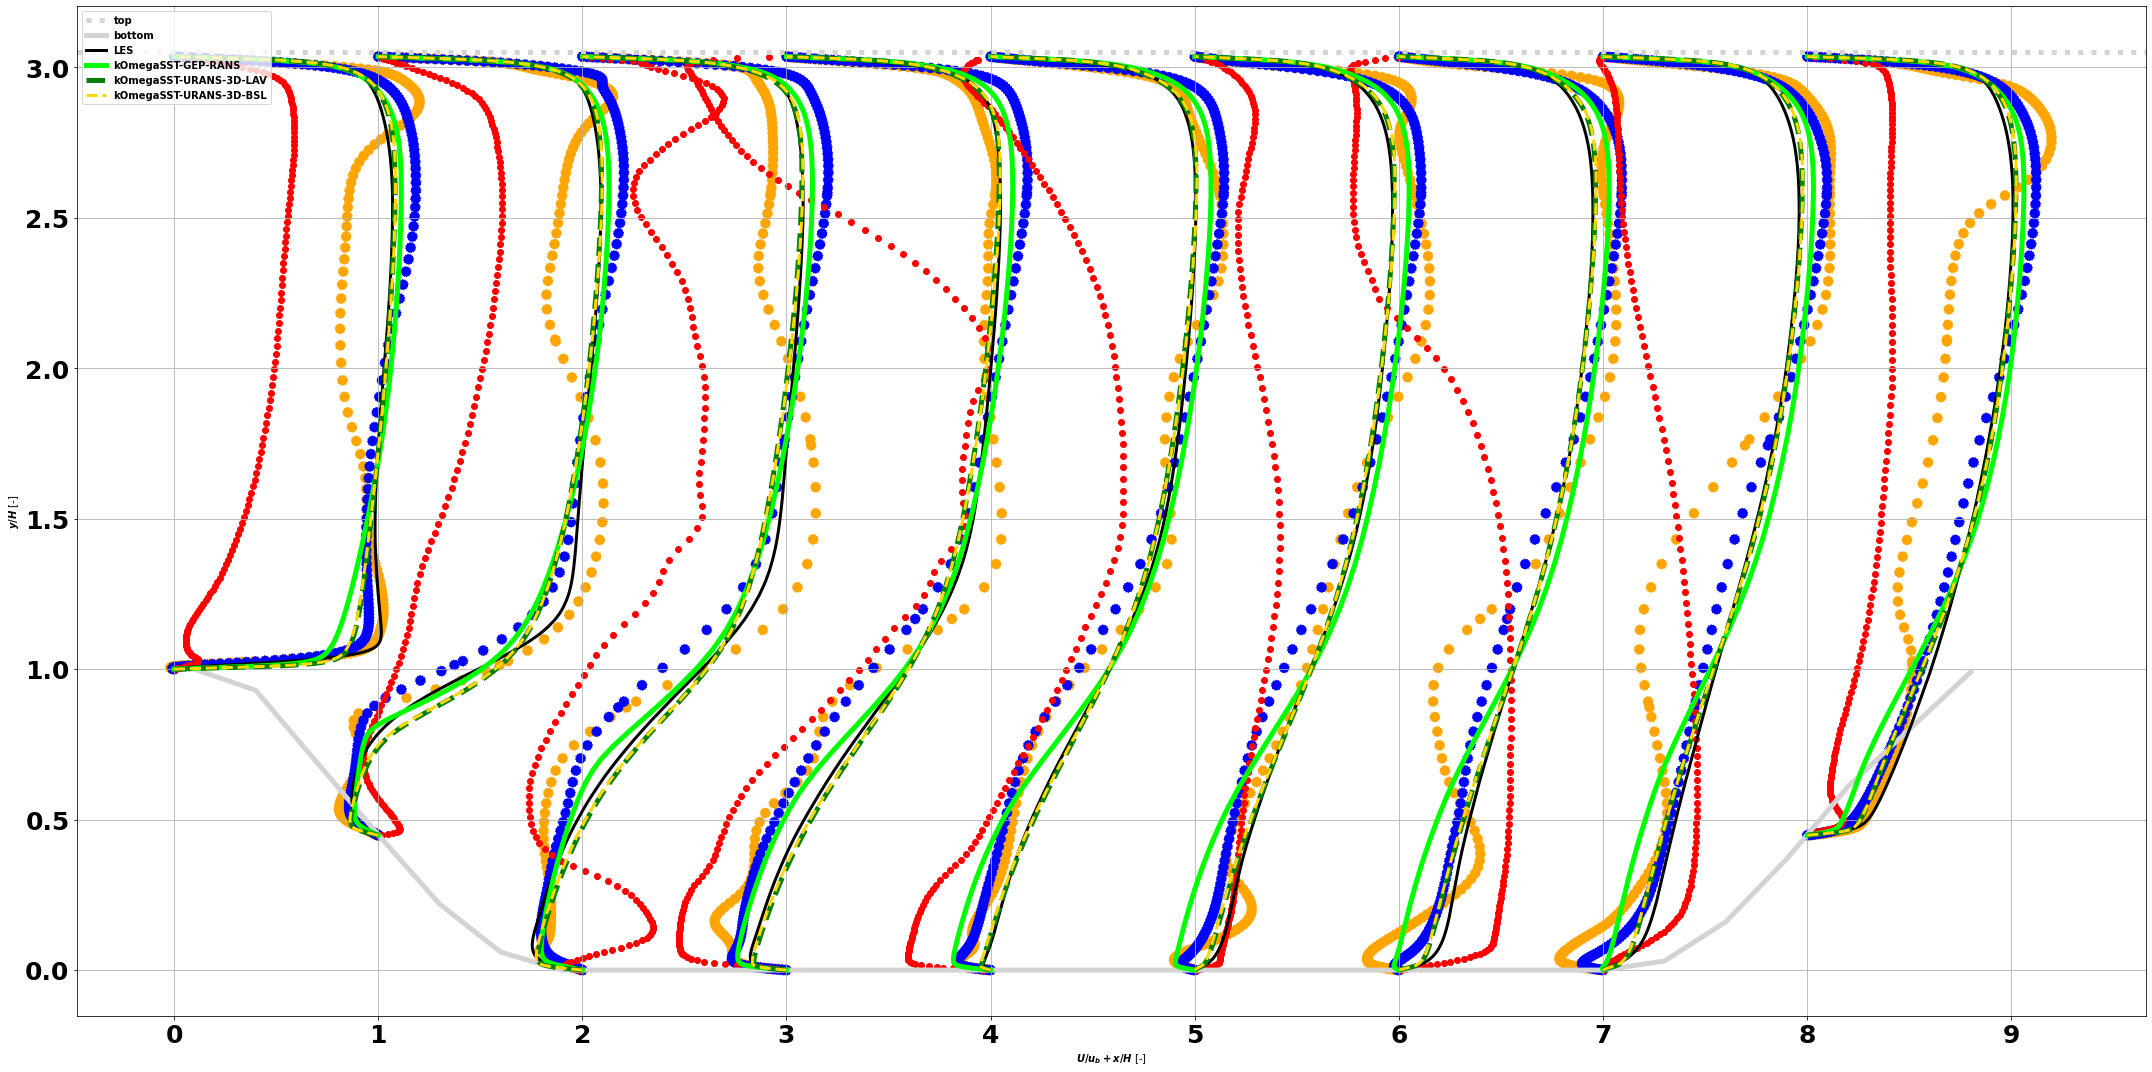

In [52]:
plt.figure(figsize=(30,15), frameon=False)
plt.axhline(y = 3.05, xmin=0, xmax=9, color = 'lightgrey', linestyle = 'dotted', linewidth=5)
plt.plot(hill[:,0], hill[:,1], label='PH', linewidth=5, c='lightgrey', linestyle = '-')

for f in range(0,9):
    
    plt.plot(REF[f][:,1]+f,                                REF[f][:,0],                              c='k',        linewidth=3,                     label='REF.')
    plt.plot(Fabian_BSL_U[f]['U_0']+f,                     Fabian_BSL_U[f]['y'],                     c='lime',     linewidth=5,                     label='Fabian_BSL')
    plt.plot(Fabian_best_U[f]['U_0']+f,                    Fabian_best_U[f]['y'],                    c='green',    linewidth=5, linestyle='dashed', label='Fabian_best')
    #plt.scatter(Ali_BSL_U[f][:,1]+f,                      Ali_BSL_U[f][:,0],                        c='y',                                         label='kOmegaSST')
    #plt.scatter(L_kEpsilon_U[f][:,1]+f,                   L_kEpsilon_U[f][:,0],                     c='g',                                         label='kEpsilon')
    #plt.scatter(L_SA_U[f][:,1]+f,                         L_SA_U[f][:,0],                           c='pink',                                      label='BSL SA')
    #plt.scatter(L_kEpsilon_RL_U[f][:,1]+f,                L_kEpsilon_RL_U[f][:,0],                  c='red',                                       label='kEpsilon_RL') ### terrible!
    #plt.scatter(Ali_kEpsilonPhitF_U[f][:,1]+f,            Ali_kEpsilonPhitF_U[f][:,0],              c='violet',                                    label='kEpsilonPhitF')
    #plt.scatter(Ali2_kEpsilonPhitF_U[f][:,1]+f,           Ali2_kEpsilonPhitF_U[f][:,0],             c='m',                                         label='kEpsilonPhitF')
    #plt.scatter(L_RNGkEpsilon_U[f][:,1]+f,                L_RNGkEpsilon_U[f][:,0],                  c='r',                                         label='RNGkEpsilon')
    #plt.scatter(L_v2f_U[f]['U_0']+f,                      L_v2f_U[f]['y'],                          c='pink',                                      label='L_v2f')
    plt.plot(L_kOmegaSST_UVKRxy_U[f]['U_0']+f,        L_kOmegaSST_UVKRxy_U[f]['y'],             c='gold',     linewidth=3, linestyle='dashed', label='L_kOmegaSST_UVKRxy')
    #plt.plot(L_kOmegaSST_UVKRxy_added_feats_U[f]['U_0']+f,L_kOmegaSST_UVKRxy_added_feats_U[f]['y'], c='magenta',  linewidth=3, linestyle='dashed', label='L_kOmegaSST_UVKRxy_added_feats')
    #####plt.plot(L_kOmegaSST_BSL_540_x_590_U[f]['U_0']+f, L_kOmegaSST_BSL_540_x_590_U[f]['y'],      c='darkblue', linewidth=3, linestyle='dashed', label='L_kOmegaSST_BSL_540_x_590')
    
    # URANS
    #plt.plot(L_BSL_U_URANS[f]['U_0']+f,                    L_BSL_U_URANS[f]['y'],                 c='lime',     linewidth=3, linestyle='dashed', label='L_BSL_U_URANS')
    #plt.plot(L_BSL_U_URANS_Mesh_270_by_290[f]['UMean_0']+f,L_BSL_U_URANS_Mesh_270_by_290[f]['y'], c='lime',     linewidth=5, linestyle='dashed', label='L_BSL_U_URANS_Mesh_270_by_290')
    #plt.plot(L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav[f]['UMean_0']+f, L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav[f]['y'], c='blue',     linewidth=5, linestyle='dashed', label='L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav')
    #plt.plot(L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav[f]['U_0']+f, L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav[f]['y'], c='orange',     linewidth=5, linestyle='dashed', label='L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav')
    #plt.plot(L_BSL_U_URANS_v2f[f]['U_0']+f,                L_BSL_U_URANS_v2f[f]['y'],             c='brown',    linewidth=3, linestyle='dashed', label='L_BSL_U_URANS_v2f')
    #####plt.plot(L_kOmegaSST_LAV_540x590_U[f]['UMean_0']+f,L_kOmegaSST_LAV_540x590_U[f]['y'],     c='red',      linewidth=3, linestyle='dashed', label='L_kOmegaSST_LAV_540_x_590_U')
    #####plt.plot(L_kOmegaSST_LAV_540x590_U[f]['U_0']+f,    L_kOmegaSST_LAV_540x590_U[f]['y'],     c='lime',     linewidth=3, linestyle='dashed', label='L_kOmegaSST_LAV_540_x_590_U')
    #plt.plot(L_kOmegaSST_LAV_240x290_U[f]['UMean_0']+f,    L_kOmegaSST_LAV_240x290_U[f]['y'],     c='blue',     linewidth=3, linestyle='dashed', label='L_kOmegaSST_LAV_240_x_290_U')
    #plt.plot(L_kOmegaSST_LAV_240x290_U[f]['U_0']+f,        L_kOmegaSST_LAV_240x290_U[f]['y'],     c='lightblue',linewidth=3, linestyle='dashed', label='L_kOmegaSST_LAV_240_x_290_U')
    
    # 3D RANS
    #####plt.scatter(L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_U[f]['U_0']+f, L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_U[f]['y'], c='darkviolet',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290')
    plt.scatter(L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U[f][:,1]+f, L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U[f][:,0], c='orange',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290 inst.')
    plt.scatter(L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U[f][:,4]+f, L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U[f][:,0], c='blue',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290 ave.')
    #plt.scatter(old_L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U[f][:,4]+f, old_L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U[f][:,0], c='lime',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290 ave.')
    #----plt.scatter(L_PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290_U[f][:,4]+f, L_PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290_U[f][:,0], c='red',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290')

    # Trained on DNS data
    
    plt.scatter(15*PH_velocity_reynolds_stress_I1_I2_MAPE_C1_C2_12_100_DNS_profiles_U[f][:,1]+f, PH_velocity_reynolds_stress_I1_I2_MAPE_C1_C2_12_100_DNS_profiles_U[f][:,0], c='r', label='GEP DNS data')

        
plt.xticks(np.arange(0, 10, step=1))
plt.ylabel("$y/H$ [-]")
plt.xlabel("$U/u_{b} + x/H$ [-]")
plt.tight_layout()
plt.legend(['top', 'bottom', 'LES', 'kOmegaSST-GEP-RANS', 'kOmegaSST-URANS-3D-LAV', 'kOmegaSST-URANS-3D-BSL'], loc='upper left')
plt.savefig('PH_U.pdf')
plt.grid()
#plt.legend(['top', 'bottom', 'LES', 'Fabian BSL', 'Fabian best', 'kOmegaSST', 'kEpsilon', 'kEpsilonPhitF', 'RNGkEpsilon'], loc='lower right')
#plt.legend(['top', 'bottom', 'LES', 'Fabian BSL', 'Fabian best', 'kOmegaSST', 'kEpsilon', 'kEpsilonPhitF'], loc='upper left')

plt.show()
plt.close()

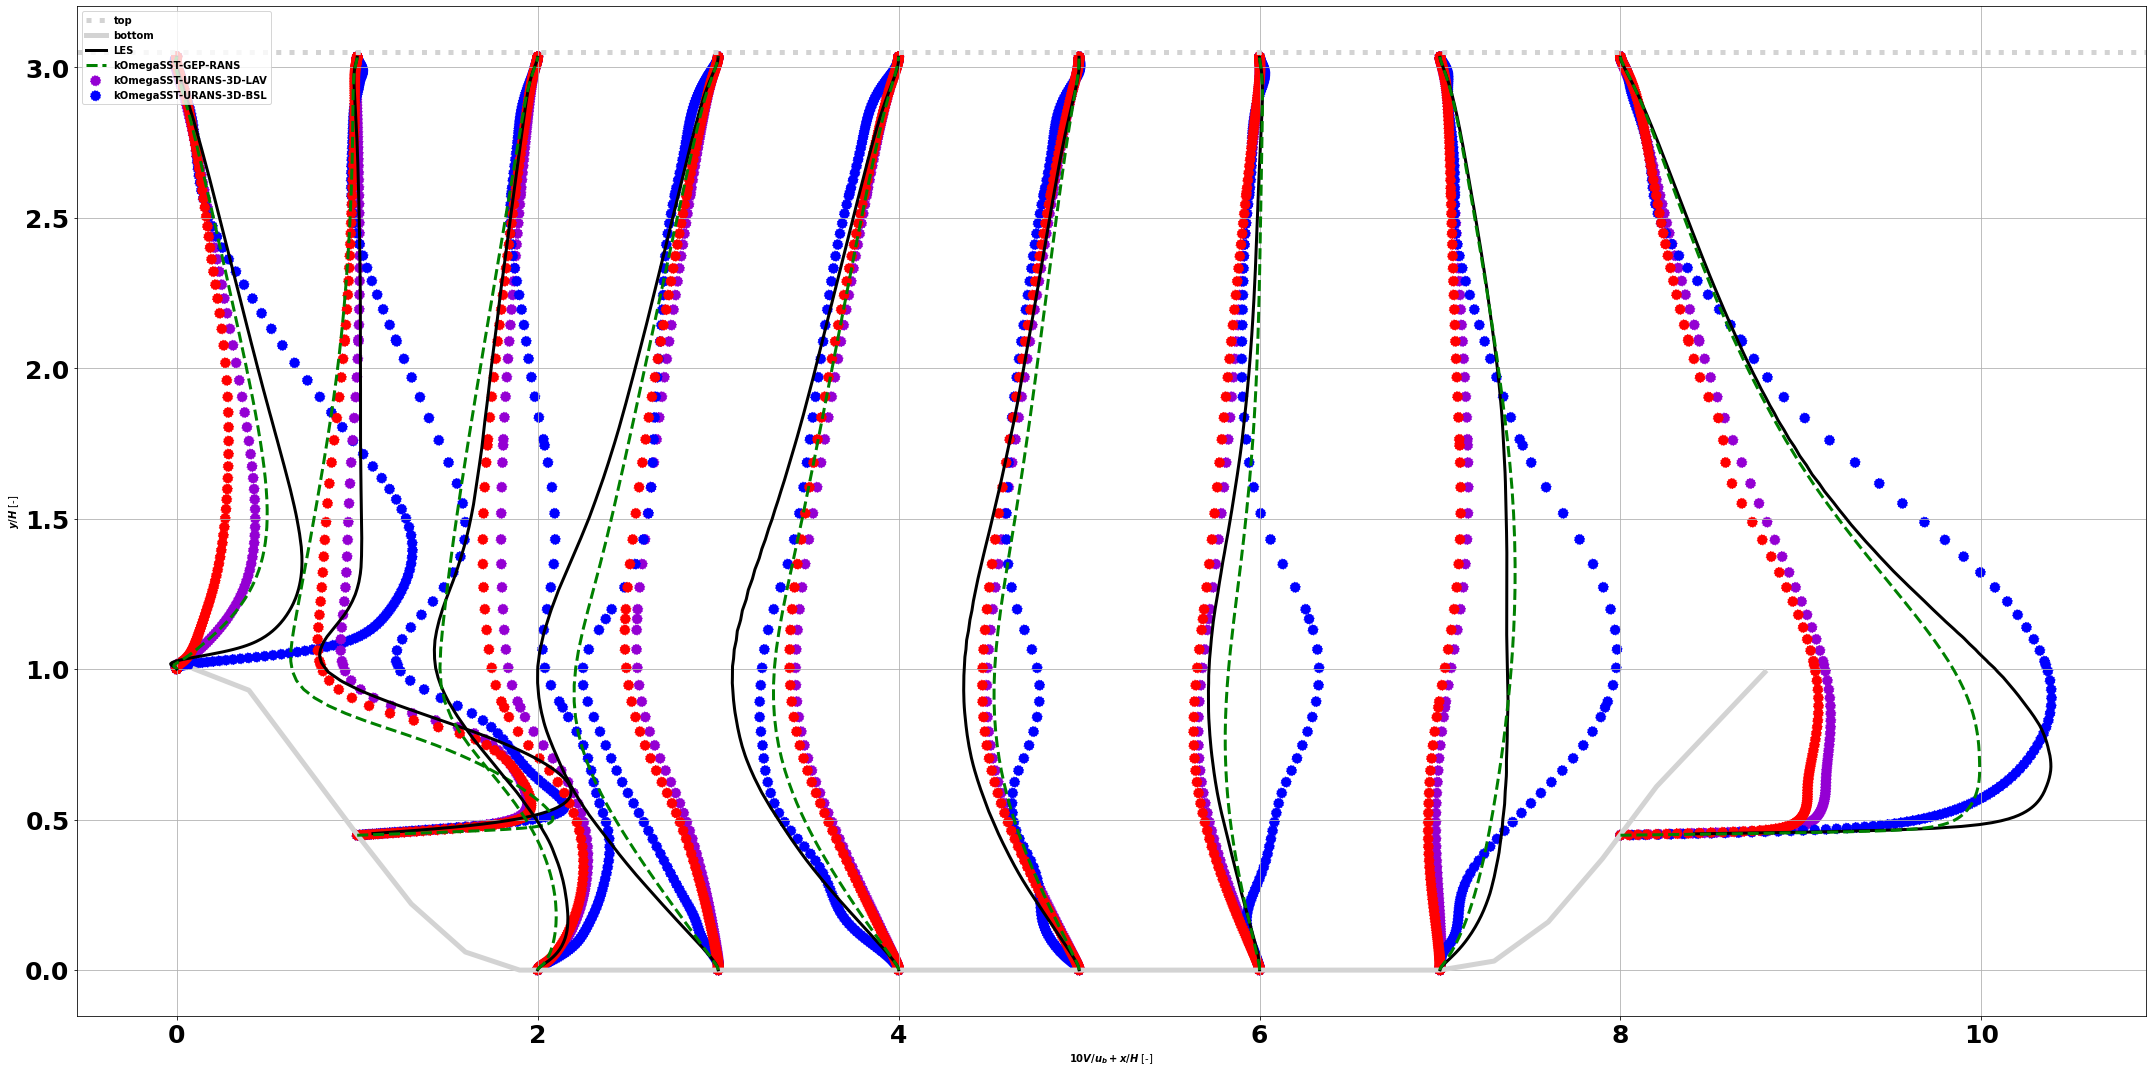

In [41]:
plt.figure(figsize=(30,15), frameon=False)
plt.axhline(y = 3.05, xmin=0, xmax=9, color = 'lightgrey', linestyle = 'dotted', linewidth=5)
plt.plot(hill[:,0], hill[:,1], label='PH', linewidth=5, c='lightgrey', linestyle = '-')

fac = 10

for f in range(0,9):

    plt.plot(fac*REF[f][:,2]+f,                                REF[f][:,0], label='REF.', linewidth=3, c='k')
    #plt.plot(fac*Fabian_BSL_U[f]['U_1']+f,                    Fabian_BSL_U[f]['y'], c='red', label='Fabian_BSL', linewidth=3)
    plt.plot(fac*Fabian_best_U[f]['U_1']+f,                    Fabian_best_U[f]['y'], c='green', linestyle = '--', linewidth=3,label='Fabian_best')
    #plt.scatter(fac*Ali_BSL_U[f][:,2]+f,                      Ali_BSL_U[f][:,0], c='y', label='kOmegaSST')
    #plt.scatter(fac*L_kEpsilon_U[f][:,2]+f,                   L_kEpsilon_U[f][:,0], c='g', label='kEpsilon')
    #plt.scatter(fac*L_SA_U[f][:,2]+f,                         L_SA_U[f][:,0], c='pink', label='BSL SA')
    #plt.scatter(fac*L_kEpsilon_RL_U[f][:,2]+f,                L_kEpsilon_RL_U[f][:,0], c='red', label='kEpsilon_RL') ### terrible!
    #plt.scatter(fac*Ali_kEpsilonPhitF_U[f][:,2]+f,            Ali_kEpsilonPhitF_U[f][:,0], c='violet', label='kEpsilonPhitF')
    #plt.scatter(fac*Ali2_kEpsilonPhitF_U[f][:,2]+f,           Ali2_kEpsilonPhitF_U[f][:,0], c='m', label='kEpsilonPhitF')
    #plt.scatter(fac*L_RNGkEpsilon_U[f][:,2]+f,                L_RNGkEpsilon_U[f][:,0], c='r', label='RNGkEpsilon')
    #plt.plot(fac*L_kOmegaSST_UVKRxy_U[f]['U_1']+f,            L_kOmegaSST_UVKRxy_U[f]['y'],   c='gold',  linewidth=3, linestyle='dashed', label='L_kOmegaSST_UVKRxy')
    #plt.plot(fac*L_kOmegaSST_UVKRxy_added_feats_U[f]['U_1']+f,L_kOmegaSST_UVKRxy_added_feats_U[f]['y'],   c='magenta',  linewidth=3, linestyle='dashed', label='L_kOmegaSST_UVKRxy_added_feats')

    # URANS
    #plt.plot(fac*L_BSL_U_URANS[f]['U_1']+f,                    L_BSL_U_URANS[f]['y'],                 c='lime',      linewidth=5, linestyle='dashed', label='L_BSL_U_URANS')
    #plt.plot(fac*L_BSL_U_URANS_Mesh_270_by_290[f]['UMean_1']+f, L_BSL_U_URANS_Mesh_270_by_290[f]['y'], c='lime',      linewidth=5, linestyle='dashed', label='L_BSL_U_URANS_Mesh_270_by_290')
    #plt.plot(fac*L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav[f]['UMean_1']+f, L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav[f]['y'], c='blue',     linewidth=5, linestyle='dashed', label='L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav')
    #lt.plot(fac*L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav[f]['U_1']+f, L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav[f]['y'], c='orange',     linewidth=5, linestyle='dashed', label='L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav')
    #plt.plot(fac*L_kOmegaSST_UVKRxy_U[f]['U_1']+f,             L_kOmegaSST_UVKRxy_U[f]['y'],          c='gold',      linewidth=3, linestyle='dashed', label='L_kOmegaSST_UVKRxy_U')
    #plt.plot(fac*L_kOmegaSST_BSL_540_x_590_U[f]['U_1']+f,      L_kOmegaSST_BSL_540_x_590_U[f]['y'],   c='darkblue',  linewidth=3, linestyle='dashed', label='L_kOmegaSST_BSL_540_x_590_U')
    #plt.plot(fac*L_kOmegaSST_LAV_270_x_290_U[f]['U_1']+f,      L_kOmegaSST_LAV_270_x_290_U[f]['y'],   c='yellow',    linewidth=3, linestyle='dashed', label='L_kOmegaSST_LAV_270_x_290_U')
    #plt.plot(fac*L_kOmegaSST_LAV_540x590_U[f]['UMean_1']+f,    L_kOmegaSST_LAV_540x590_U[f]['y'],     c='blue',      linewidth=3, linestyle='dashed', label='L_kOmegaSST_LAV_540x590_U')
    #plt.plot(fac*L_kOmegaSST_LAV_540x590_U[f]['U_1']+f,        L_kOmegaSST_LAV_540x590_U[f]['y'],     c='lightblue', linewidth=3, linestyle='dashed', label='L_kOmegaSST_LAV_540x590_U')

    # 3D RANS
    plt.scatter(fac*L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_U[f]['U_1']+f, L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_U[f]['y'], c='darkviolet',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290')
    #plt.scatter(fac*L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U[f][:,2]+f, L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U[f][:,0], c='orange',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290')
    plt.scatter(fac*L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U[f][:,5]+f, L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U[f][:,0], c='blue',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290')
    plt.scatter(fac*L_PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290_U[f][:,5]+f, L_PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290_U[f][:,0], c='red',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290')
    #plt.scatter(fac*old_L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U[f][:,5]+f, old_L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U[f][:,0], c='lime',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290 ave.')

plt.ylabel("$y/H$ [-]")
plt.xlabel("$10 V/u_{b} + x/H$ [-]")
plt.tight_layout()
#plt.legend(['top', 'bottom', 'LES', 'kOmegaSST-BSL', 'kOmegaSST-GEP'], loc='upper right')
plt.legend(['top', 'bottom', 'LES', 'kOmegaSST-GEP-RANS', 'kOmegaSST-URANS-3D-LAV', 'kOmegaSST-URANS-3D-BSL'], loc='upper left')
plt.savefig('PH_V.pdf')
plt.grid()
#plt.legend(['top', 'bottom', 'LES', 'Fabian BSL', 'Fabian best', 'kOmegaSST', 'kEpsilon', 'kEpsilonPhitF', 'RNGkEpsilon'], loc='lower right')
#plt.legend(['top', 'bottom', 'LES', 'Fabian BSL', 'Fabian best', 'kOmegaSST', 'kEpsilon', 'kEpsilonPhitF'], loc='lower right')
plt.show()
plt.close()

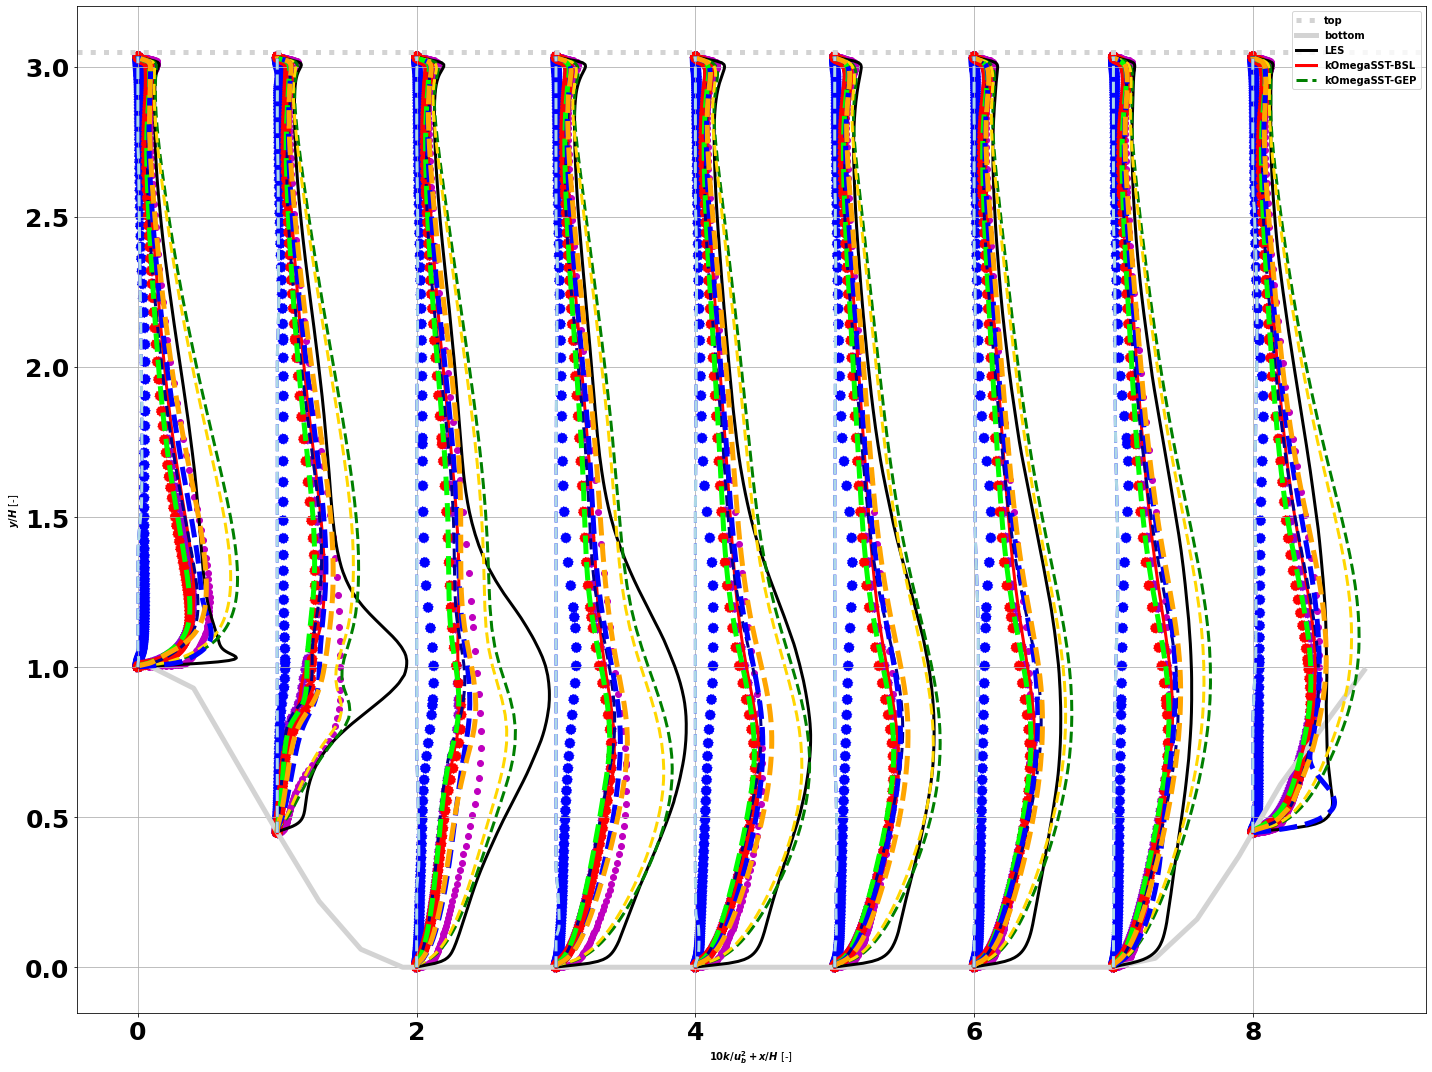

In [42]:
plt.figure(figsize=(20,15), frameon=False)
plt.axhline(y = 3.05, xmin=0, xmax=9, color = 'lightgrey', linestyle = 'dotted', linewidth=5)
plt.plot(hill[:,0], hill[:,1], label='PH', linewidth=5, c='lightgrey', linestyle = '-')
fac = 10
for f in range(0,9):
    
    plt.plot(fac*REF[f][:,6]+f,                              REF[f][:,0],                              c='k',        label='REF.', linewidth=3)
    plt.plot(fac*Fabian_BSL_k[f]['k']+f,                     Fabian_BSL_k[f]['y'],                     c='red',      label='Fabian_BSL', linewidth=3)
    plt.plot(fac*Fabian_best_k[f]['k']+f,                    Fabian_best_k[f]['y'],                    c='green',    label='Fabian_best', linestyle = '--', linewidth=3)
    #plt.scatter(fac*Ali_BSL_k[f][:,1]+f,                    Ali_BSL_k[f][:,0],                        c='y',        label='kOmegaSST')
    #plt.scatter(fac*L_kEpsilon_k[f][:,1]+f,                 L_kEpsilon_k[f][:,0],                     c='g',        label='kEpsilon')
    #plt.scatter(fac*L_SA_k[f][:,1]+f,                       L_SA_k[f][:,0],                           c='pink',     label='BSL SA')
    #plt.scatter(fac*L_kEpsilon_RL_k[f][:,1]+f,              L_kEpsilon_RL_k[f][:,0],                  c='red',      label='kEpsilon_RL') ### terrible!
    #plt.scatter(fac*Ali_kEpsilonPhitF_k[f][:,1]+f,          Ali_kEpsilonPhitF_k[f][:,0],              c='violet',   label='kEpsilonPhitF')
    plt.scatter(fac*Ali2_kEpsilonPhitF_k[f][:,1]+f,          Ali2_kEpsilonPhitF_k[f][:,0],             c='m',        label='kEpsilonPhitF')
    #plt.scatter(fac*L_RNGkEpsilon_k[f][:,1]+f,              L_RNGkEpsilon_k[f][:,0],                  c='r',        label='RNGkEpsilon')
    plt.plot(fac*L_kOmegaSST_UVKRxy_k[f]['k']+f,             L_kOmegaSST_UVKRxy_k[f]['y'],             c='gold',     linewidth=3, linestyle='dashed', label='L_kOmegaSST_UVKRxy_k')
    #plt.plot(fac*L_kOmegaSST_UVKRxy_added_feats_k[f]['k']+f, L_kOmegaSST_UVKRxy_added_feats_k[f]['y'], c='magenta',  linewidth=3, linestyle='dashed', label='L_kOmegaSST_UVKRxy_added_feats')
    plt.plot(fac*L_kOmegaSST_BSL_540_x_590_k[f]['k']+f,      L_kOmegaSST_BSL_540_x_590_k[f]['y'],      c='darkblue', linewidth=3, linestyle='dashed', label='L_kOmegaSST_BSL_540_x_590_k')
    
    # URANS
    #plt.plot(fac*L_BSL_k_URANS[f]['k']+f,                    L_BSL_k_URANS[f]['y'],                 c='lime',      linewidth=5, linestyle='dashed', label='L_BSL_k_URANS')
    plt.plot(fac*L_BSL_k_URANS_Mesh_270_by_290[f]['kMean']+f, L_BSL_k_URANS_Mesh_270_by_290[f]['y'], c='lime',      linewidth=5, linestyle='dashed', label='L_BSL_k_URANS_Mesh_270_by_290')
    plt.plot(fac*L_BSL_k_URANS_Mesh_270_by_290_Chitrarth_Lav[f]['kMean']+f, L_BSL_k_URANS_Mesh_270_by_290_Chitrarth_Lav[f]['y'], c='blue',     linewidth=5, linestyle='dashed', label='L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav')
    plt.plot(fac*L_BSL_k_URANS_Mesh_270_by_290_Chitrarth_Lav[f]['k']+f, L_BSL_k_URANS_Mesh_270_by_290_Chitrarth_Lav[f]['y'], c='orange',     linewidth=5, linestyle='dashed', label='L_BSL_U_URANS_Mesh_270_by_290_Chitrarth_Lav')   
    #plt.plot(fac*L_kOmegaSST_LAV_270_x_290_k[f]['kMean']+f,  L_kOmegaSST_LAV_270_x_290_k[f]['y'],   c='lime',      linewidth=3, linestyle='dashed', label='L_kOmegaSST_LAV_270_x_290_k')
    #plt.plot(fac*L_kOmegaSST_LAV_540x590_k[f]['kMean']+f,    L_kOmegaSST_LAV_540x590_k[f]['y'],     c='red',       linewidth=3, linestyle='dashed', label='L_kOmegaSST_LAV_270_x_290_U')
    #plt.plot(fac*L_kOmegaSST_LAV_540x590_k[f]['k']+f,        L_kOmegaSST_LAV_540x590_k[f]['y'],     c='lime',      linewidth=3, linestyle='dashed', label='L_kOmegaSST_LAV_270_x_290_U')
    plt.plot(fac*L_kOmegaSST_LAV_240x290_k[f]['kMean']+f,    L_kOmegaSST_LAV_240x290_k[f]['y'],     c='blue',      linewidth=3, linestyle='dashed', label='L_kOmegaSST_LAV_270_x_290_K')
    plt.plot(fac*L_kOmegaSST_LAV_240x290_k[f]['k']+f,        L_kOmegaSST_LAV_240x290_k[f]['y'],     c='lightblue', linewidth=3, linestyle='dashed', label='L_kOmegaSST_LAV_270_x_290_K')
    
    # 3D RANS
    plt.scatter(fac*L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_k[f]['k']+f, L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_k[f]['y'], c='darkviolet',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290')
    #plt.scatter(fac*L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U[f][:,2]+f, L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U[f][:,0], c='orange',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290')
    plt.scatter(fac*L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_k[f][:,2]+f, L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_k[f][:,0], c='blue',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290')
    plt.scatter(fac*L_PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290_k[f][:,2]+f, L_PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290_k[f][:,0], c='red',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_BSL_URANS_Mesh_270_by_290')

plt.ylabel("$y/H$ [-]")
plt.xlabel("$10 k/u^2_{b} + x/H$ [-]")
plt.tight_layout()
plt.legend(['top', 'bottom', 'LES', 'kOmegaSST-BSL', 'kOmegaSST-GEP'], loc='upper right')
plt.savefig('PH_k.pdf')
plt.grid()
#plt.legend(['top', 'bottom', 'LES', 'Fabian BSL', 'Fabian best', 'kOmegaSST', 'kEpsilon', 'kEpsilonPhitF', 'RNGkEpsilon'], loc='lower right')
#plt.legend(['top', 'bottom', 'LES', 'Fabian BSL', 'Fabian best', 'kOmegaSST', 'kEpsilon', 'kEpsilonPhitF'], loc='lower right')
plt.show()
plt.close()

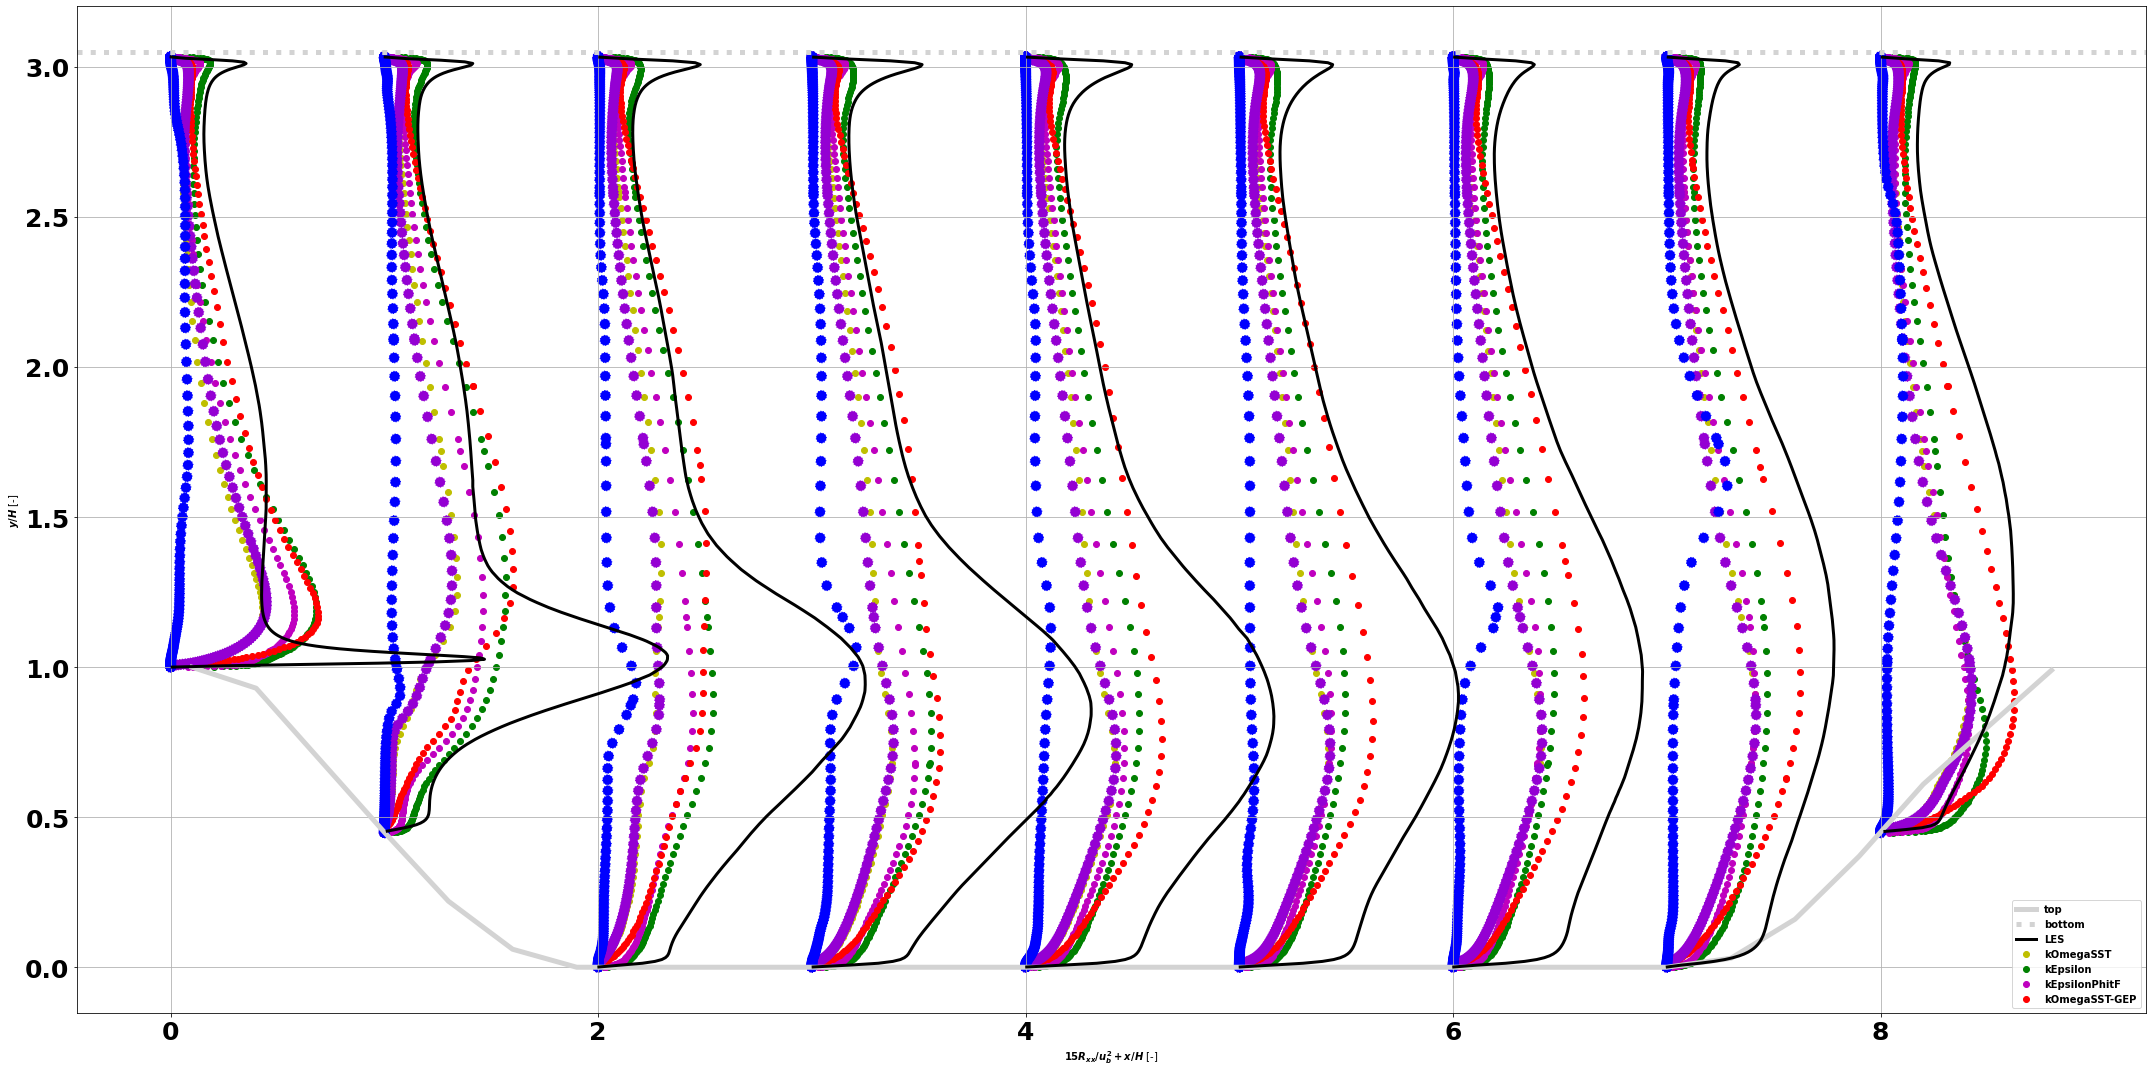

In [43]:
plt.figure(figsize=(30,15), frameon=False)
plt.plot(hill[:,0], hill[:,1], label='PH', linewidth=5, c='lightgrey', linestyle = '-')
plt.axhline(y = 3.05, xmin=0, xmax=9, color = 'lightgrey', linestyle = 'dotted', linewidth=5)
fac = 15
for f in range(0,9):
    
    plt.plot(fac*REF[f][:,3]+f, REF[f][:,0], label='REF.', linewidth=3, c='k')
    #plt.scatter(fac*Fabian_BSL_R[f]['']+f, Fabian_BSL_R[f]['y'], c='magenta', label='Fabian_BSL')
    #plt.scatter(fac*Fabian_best_R[f]['k']+f, Fabian_best_R[f]['y'], c='b', label='Fabian_best')
    plt.scatter(fac*Ali_BSL_R[f][:,1]+f, Ali_BSL_R[f][:,0], c='y', label='kOmegaSST')
    plt.scatter(fac*L_kEpsilon_R[f][:,1]+f, L_kEpsilon_R[f][:,0], c='g', label='kEpsilon')
    #plt.scatter(fac*L_SA_R[f][:,1]+f, L_SA_R[f][:,0], c='pink', label='BSL SA')
    #plt.scatter(fac*L_kEpsilon_RL_R[f][:,1]+f, L_kEpsilon_RL_R[f][:,0], c='red', label='kEpsilon_RL') ### terrible!
    #plt.scatter(fac*Ali_kEpsilonPhitF_R[f][:,1]+f, Ali_kEpsilonPhitF_R[f][:,0], c='violet', label='kEpsilonPhitF')
    plt.scatter(fac*Ali2_kEpsilonPhitF_R[f][:,1]+f, Ali2_kEpsilonPhitF_R[f][:,0], c='m', label='kEpsilonPhitF')
    #plt.scatter(fac*L_RNGkEpsilon_R[f][:,1]+f, L_RNGkEpsilon_R[f][:,0], c='r', label='RNGkEpsilon')
    plt.scatter(fac*Ali_GEP_R[f][:,1]+f, Ali_GEP_R[f][:,0], c='r', label='Ali GEP')    
    #plt.plot(fac*L_kOmegaSST_UVKRxy_R[f]['R_0']+f,         L_kOmegaSST_UVKRxy_R[f]['y'],          c='gold',     linewidth=3, linestyle='dashed', label='L_kOmegaSST_UVKRxy_R')
    #plt.plot(fac*L_kOmegaSST_BSL_540_x_590_R[f]['R_0']+f,  L_kOmegaSST_BSL_540_x_590_R[f]['y'],   c='darkblue', linewidth=3, linestyle='dashed', label='L_kOmegaSST_BSL_540_x_590_R')
    #plt.plot(fac*L_kOmegaSST_UVKRxy_added_feats_R[f]['R_0']+f, L_kOmegaSST_UVKRxy_added_feats_R[f]['y'], c='magenta',  linewidth=3, linestyle='dashed', label='L_kOmegaSST_UVKRxy_added_feats')

    # URANS
    #plt.plot(fac*L_BSL_R_URANS[f]['R_0']+f,                L_BSL_R_URANS[f]['y'],                 c='lime',     linewidth=3, linestyle='dashed', label='L_BSL_R_URANS')
    #plt.plot(fac*L_BSL_R_URANS_Mesh_270_by_290[f]['R_0']+f, L_BSL_R_URANS_Mesh_270_by_290[f]['y'], c='lime',     linewidth=5, linestyle='dashed', label='L_BSL_R_URANS_Mesh_270_by_290')
    
    # 3D RANS
    plt.scatter(fac*L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_R[f]['R_0']+f, L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_R[f]['y'], c='darkviolet',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290')
    #plt.scatter(fac*L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_R[f][:,2]+f, L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_U[f][:,0], c='orange',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290')
    plt.scatter(fac*L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_R[f][:,1]+f, L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_R[f][:,0], c='blue',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290')
    
plt.ylabel("$y/H$ [-]")
plt.xlabel("$15 R_{xx}/u^2_{b} + x/H$ [-]")
plt.tight_layout()
plt.savefig('PH_xx.pdf')
plt.grid()
#plt.legend(['top', 'bottom', 'LES', 'Fabian BSL', 'Fabian best', 'kOmegaSST', 'kEpsilon', 'kEpsilonPhitF', 'RNGkEpsilon'], loc='lower right')
#plt.legend(['top', 'bottom', 'LES', 'Fabian BSL', 'Fabian best', 'kOmegaSST', 'kEpsilon', 'kEpsilonPhitF'], loc='lower right')
plt.legend(['top', 'bottom', 'LES', 'kOmegaSST', 'kEpsilon', 'kEpsilonPhitF', 'kOmegaSST-GEP'], loc='lower right')
plt.show()
plt.close()

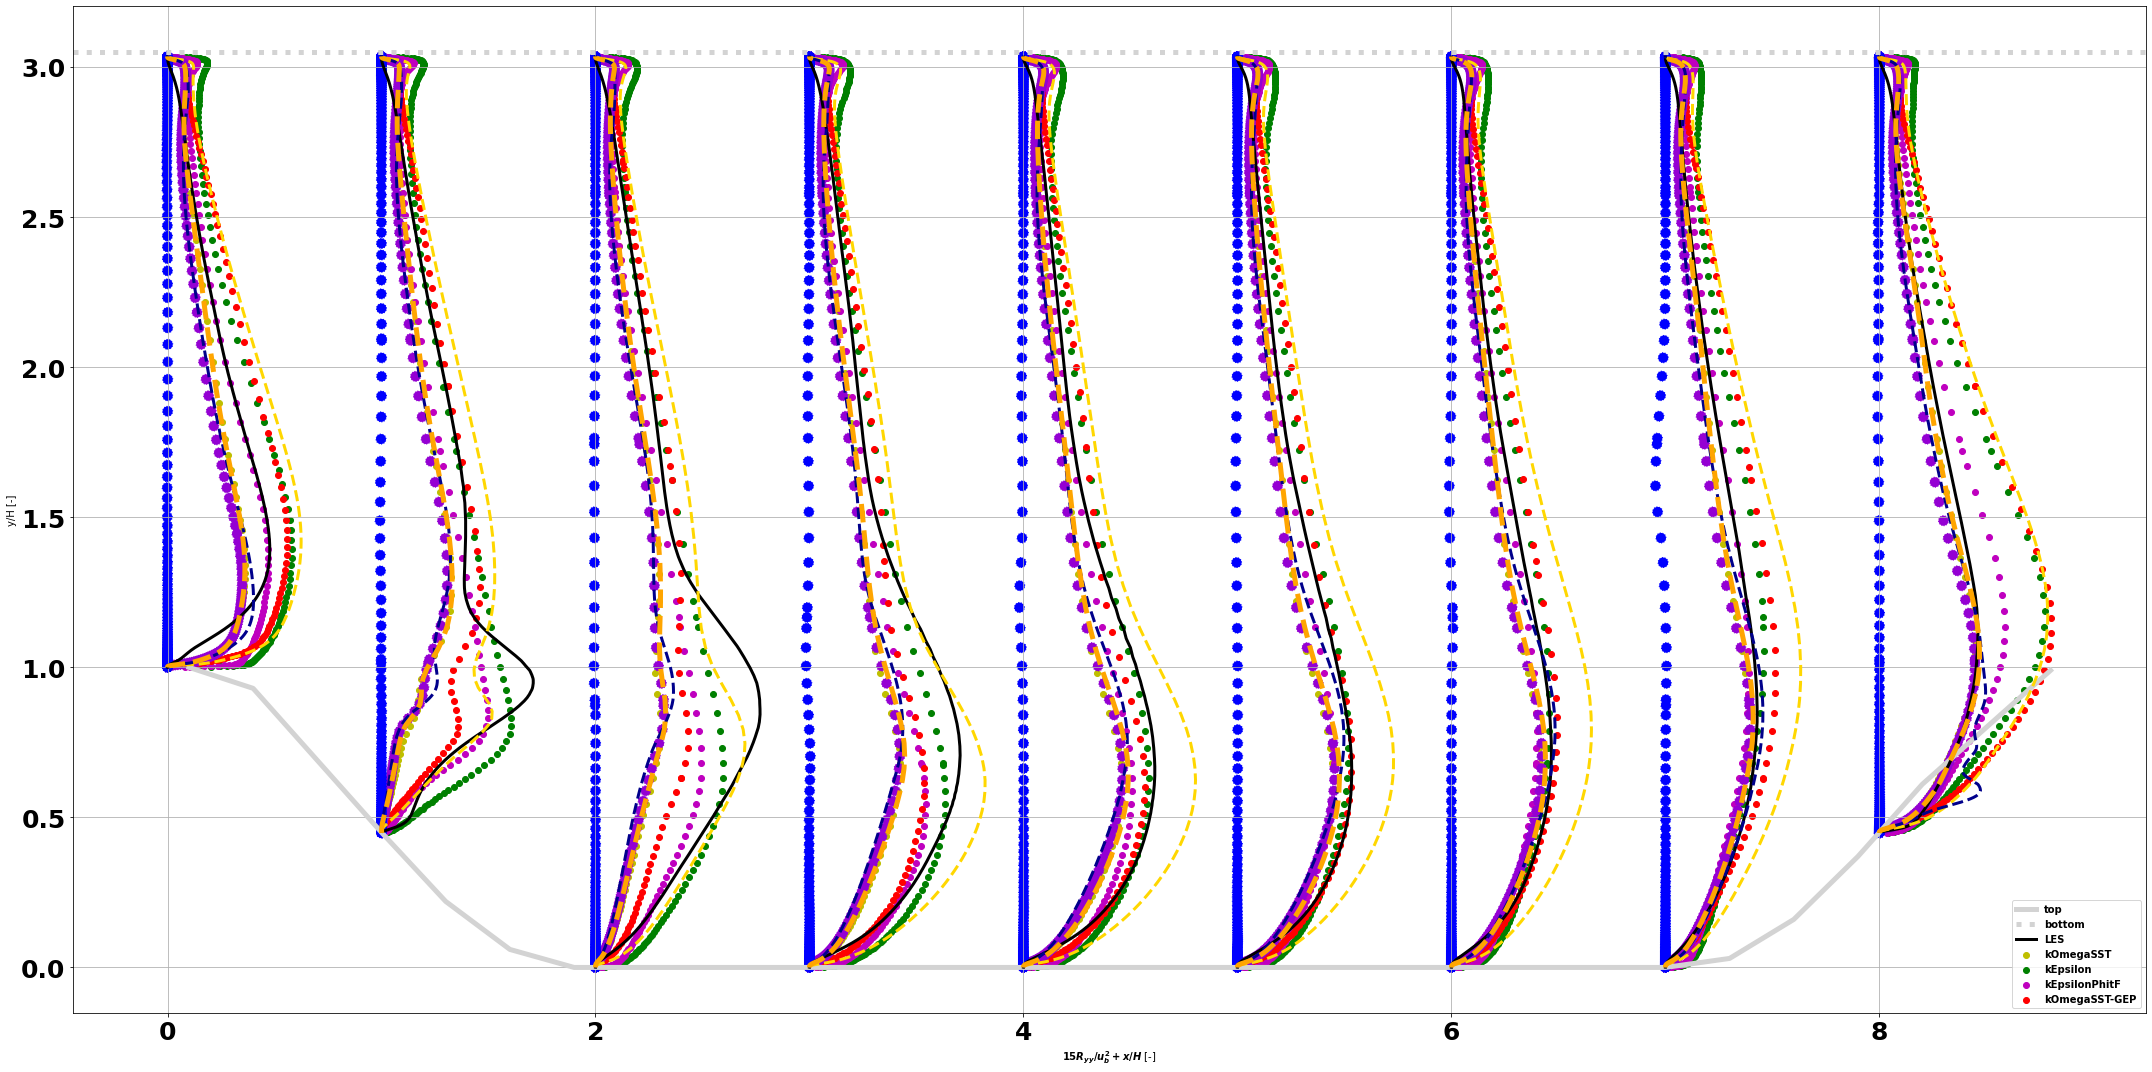

In [44]:
plt.figure(figsize=(30,15), frameon=False)
plt.plot(hill[:,0], hill[:,1], label='PH', linewidth=5, c='lightgrey', linestyle = '-')
plt.axhline(y = 3.05, xmin=0, xmax=9, color = 'lightgrey', linestyle = 'dotted', linewidth=5)
fac = 15
for f in range(0,9):
    
    plt.plot(fac*REF[f][:,4]+f, REF[f][:,0], label='REF.', linewidth=3, c='k')
    #plt.scatter(fac*Fabian_BSL_R[f]['']+f, Fabian_BSL_R[f]['y'], c='magenta', label='Fabian_BSL')
    #plt.scatter(fac*Fabian_best_R[f]['k']+f, Fabian_best_R[f]['y'], c='b', label='Fabian_best')
    plt.scatter(fac*Ali_BSL_R[f][:,4]+f, Ali_BSL_R[f][:,0], c='y', label='kOmegaSST')
    plt.scatter(fac*L_kEpsilon_R[f][:,4]+f, L_kEpsilon_R[f][:,0], c='g', label='kEpsilon')
    #plt.scatter(fac*L_SA_R[f][:,4]+f, L_SA_R[f][:,0], c='pink', label='BSL SA')
    #plt.scatter(fac*L_kEpsilon_RL_R[f][:,4]+f, L_kEpsilon_RL_R[f][:,0], c='red', label='kEpsilon_RL') ### terrible!
    #plt.scatter(fac*Ali_kEpsilonPhitF_R[f][:,4]+f, Ali_kEpsilonPhitF_R[f][:,0], c='violet', label='kEpsilonPhitF')
    plt.scatter(fac*Ali2_kEpsilonPhitF_R[f][:,4]+f, Ali2_kEpsilonPhitF_R[f][:,0], c='m', label='kEpsilonPhitF')
    #plt.scatter(fac*L_RNGkEpsilon_R[f][:,4]+f, L_RNGkEpsilon_R[f][:,0], c='r', label='RNGkEpsilon')
    plt.scatter(fac*Ali_GEP_R[f][:,4]+f, Ali_GEP_R[f][:,0], c='r', label='Ali GEP')
    plt.plot(fac*L_kOmegaSST_UVKRxy_R[f]['R_3']+f, L_kOmegaSST_UVKRxy_R[f]['y'], c='gold', linewidth=3, linestyle='dashed', label='L_kOmegaSST_UVKRxy_R')
    plt.plot(fac*L_kOmegaSST_BSL_540_x_590_R[f]['R_3']+f, L_kOmegaSST_BSL_540_x_590_R[f]['y'], c='darkblue', linewidth=3, linestyle='dashed', label='L_kOmegaSST_BSL_540_x_590_R')
    #plt.plot(fac*L_kOmegaSST_UVKRxy_added_feats_R[f]['R_3']+f, L_kOmegaSST_UVKRxy_added_feats_R[f]['y'], c='magenta',  linewidth=3, linestyle='dashed', label='L_kOmegaSST_UVKRxy_added_feats')

    # URANS
    plt.plot(fac*L_BSL_R_URANS[f]['R_3']+f,                 L_BSL_R_URANS[f]['y'],                 c='orange', linewidth=5, linestyle='dashed', label='L_BSL_R_URANS')
    #plt.plot(fac*L_BSL_R_URANS_Mesh_270_by_290[f]['R_3']+f, L_BSL_R_URANS_Mesh_270_by_290[f]['y'], c='lime',   linewidth=5, linestyle='dashed', label='L_BSL_R_URANS_Mesh_270_by_290')

    # 3D URANS
    plt.scatter(fac*L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_R[f]['R_3']+f, L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_R[f]['y'], c='darkviolet',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290')
    plt.scatter(fac*L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_R[f][:,3]+f, L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_R[f][:,0], c='blue',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290')


plt.ylabel("y/H [-]")
plt.xlabel("$15 R_{yy}/u^2_{b} + x/H$ [-]")
plt.tight_layout()
plt.savefig('PH_Ryy.pdf')
plt.grid()
#plt.legend(['top', 'bottom', 'LES', 'Fabian BSL', 'Fabian best', 'kOmegaSST', 'kEpsilon', 'kEpsilonPhitF', 'RNGkEpsilon'], loc='lower right')
#plt.legend(['top', 'bottom', 'LES', 'Fabian BSL', 'Fabian best', 'kOmegaSST', 'kEpsilon', 'kEpsilonPhitF'], loc='lower right')
plt.legend(['top', 'bottom', 'LES', 'kOmegaSST', 'kEpsilon', 'kEpsilonPhitF', 'kOmegaSST-GEP'], loc='lower right')
plt.show()
plt.close()

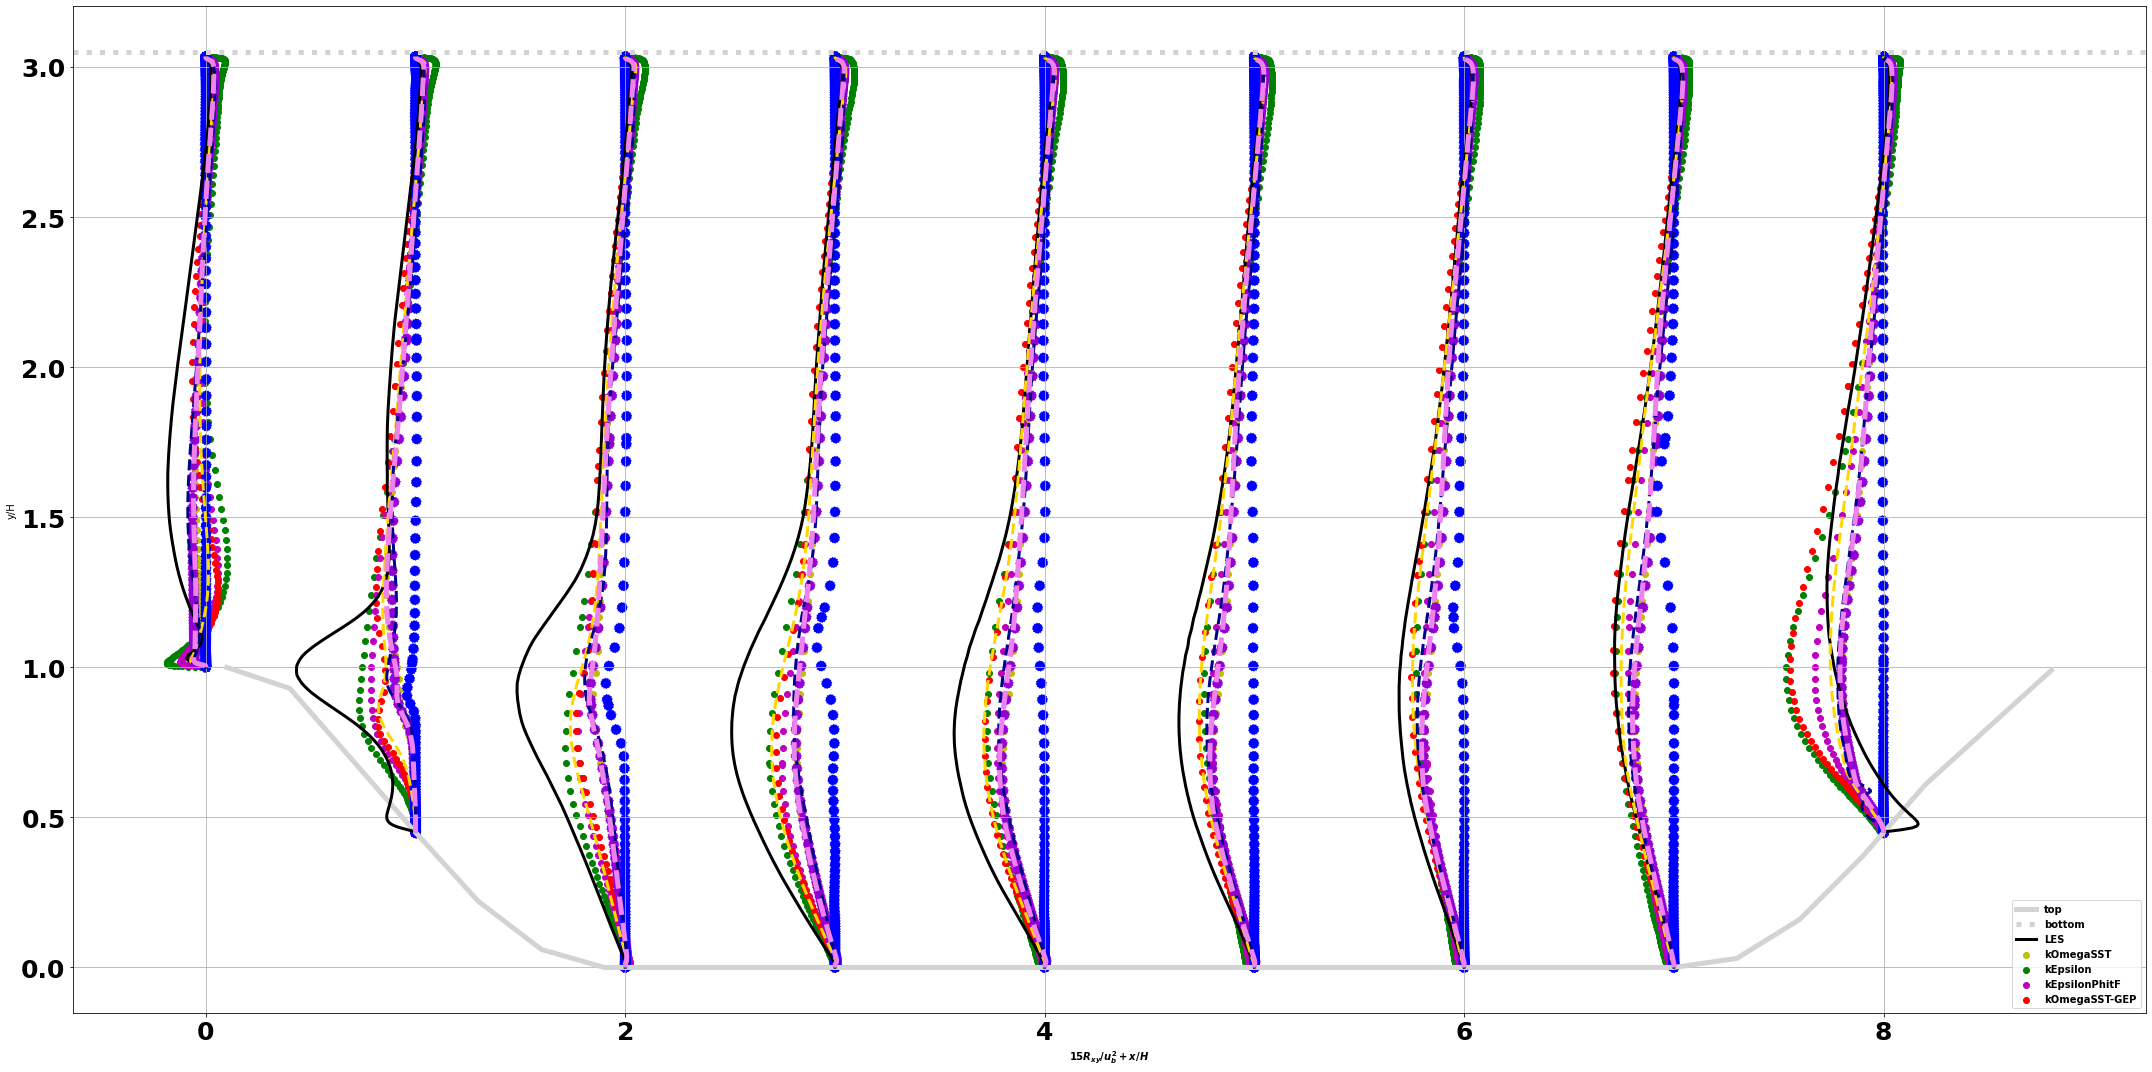

In [45]:
plt.figure(figsize=(30,15), frameon=False)
plt.plot(hill[:,0], hill[:,1], label='PH', linewidth=5, c='lightgrey', linestyle = '-')
plt.axhline(y = 3.05, xmin=0, xmax=9, color = 'lightgrey', linestyle = 'dotted', linewidth=5)
fac = 15
for f in range(0,9):
    
    plt.plot(fac*REF[f][:,5]+f, REF[f][:,0], label='REF.', linewidth=3, c='k')
    #plt.scatter(fac*Fabian_BSL_R[f]['']+f, Fabian_BSL_R[f]['y'], c='magenta', label='Fabian_BSL')
    #plt.scatter(fac*Fabian_best_R[f]['k']+f, Fabian_best_R[f]['y'], c='b', label='Fabian_best')
    plt.scatter(fac*Ali_BSL_R[f][:,2]+f, Ali_BSL_R[f][:,0], c='y', label='kOmegaSST')
    plt.scatter(fac*L_kEpsilon_R[f][:,2]+f, L_kEpsilon_R[f][:,0], c='g', label='kEpsilon')
    #plt.scatter(fac*L_SA_R[f][:,2]+f, L_SA_R[f][:,0], c='pink', label='BSL SA')
    #plt.scatter(fac*L_kEpsilon_RL_R[f][:,2]+f, L_kEpsilon_RL_R[f][:,0], c='red', label='kEpsilon_RL') ### terrible!
    #plt.scatter(fac*Ali_kEpsilonPhitF_R[f][:,2]+f, Ali_kEpsilonPhitF_R[f][:,0], c='violet', label='kEpsilonPhitF')
    plt.scatter(fac*Ali2_kEpsilonPhitF_R[f][:,2]+f, Ali2_kEpsilonPhitF_R[f][:,0], c='m', label='kEpsilonPhitF')
    #plt.scatter(fac*L_RNGkEpsilon_R[f][:,2]+f, L_RNGkEpsilon_R[f][:,0], c='r', label='RNGkEpsilon')
    plt.scatter(fac*Ali_GEP_R[f][:,2]+f, Ali_GEP_R[f][:,0], c='r', label='Ali GEP')
    plt.plot(fac*L_kOmegaSST_UVKRxy_R[f]['R_1']+f, L_kOmegaSST_UVKRxy_R[f]['y'], c='gold', linewidth=3, linestyle='dashed', label='L_kOmegaSST_UVKRxy_R')
    plt.plot(fac*L_kOmegaSST_BSL_540_x_590_R[f]['R_1']+f, L_kOmegaSST_BSL_540_x_590_R[f]['y'], c='darkblue', linewidth=3, linestyle='dashed', label='L_kOmegaSST_BSL_540_x_590_R')
    #plt.plot(fac*L_kOmegaSST_UVKRxy_added_feats_R[f]['R_1']+f, L_kOmegaSST_UVKRxy_added_feats_R[f]['y'], c='magenta',  linewidth=3, linestyle='dashed', label='L_kOmegaSST_UVKRxy_added_feats')

    # URANS
    plt.plot(fac*L_BSL_R_URANS[f]['R_1']+f,                 L_BSL_R_URANS[f]['y'],                 c='violet', linewidth=5, linestyle='dashed', label='L_BSL_R_URANS')
    #plt.plot(fac*L_BSL_R_URANS_Mesh_270_by_290[f]['R_1']+f, L_BSL_R_URANS_Mesh_270_by_290[f]['y'], c='lime',   linewidth=5, linestyle='dashed', label='L_BSL_R_URANS_Mesh_270_by_290')
    
    # 3D URANS
    plt.scatter(fac*L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_R[f]['R_1']+f, L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290_R[f]['y'], c='darkviolet',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_BSL_RANS_Mesh_270_by_290')
    plt.scatter(fac*L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_R[f][:,2]+f, L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290_R[f][:,0], c='blue',linestyle='dotted', s=100,label='L_PH_3D_kOmegaSSTx_LAV_URANS_Mesh_270_by_290')

plt.ylabel("y/H")
plt.xlabel("$15 R_{xy}/u^2_{b} + x/H$")
plt.tight_layout()
plt.savefig('PH_Rxy.pdf')
plt.grid()
#plt.legend(['top', 'bottom', 'LES', 'Fabian BSL', 'Fabian best', 'kOmegaSST', 'kEpsilon', 'kEpsilonPhitF'], loc='lower right')
plt.legend(['top', 'bottom', 'LES', 'kOmegaSST', 'kEpsilon', 'kEpsilonPhitF', 'kOmegaSST-GEP'], loc='lower right')
plt.show()
plt.close()

In [46]:
# Skin friction coefficient, Cf
###############################

#plt.figure(figsize=(30,15), frameon=False)
#plt.axhline(y = 0.0, color = 'gray', linestyle = '--', linewidth=3)
#plt.scatter(Y0Hb_wallShearStress_best['x'], -Y0Hb_wallShearStress_best['wallShearStress_0']/(0.5*0.697643**2), label='Fabian_best', s=100, c='g')
#plt.plot(my_wallGradU0_GEP['x'], -my_wallGradU0_GEP['wallShearStress_0']/(0.5*0.697643**2), c='r', linewidth=3, linestyle ='-.', label='Lorenzo_best')
#plt.scatter(Y0H_wallShearStress_BSL['x'], -Y0H_wallShearStress_BSL['wallShearStress_0']/(0.5*0.697643**2), label='BSL', s=100, c='y')
#plt.plot(Cf_dig[:,0], Cf_dig[:,1], c='k', linewidth=3, label='REF')
#plt.plot(my_wallGradU0_GEP_UVCF['x'], -my_wallGradU0_GEP_UVCF['wallShearStress_0']/(0.5*0.697643**2), c='lime', linewidth=3, linestyle ='-.', label='Lorenzo_best_UKCF')
#plt.plot(my_wallGradU0_GEP_UVK['x'], -my_wallGradU0_GEP_UVK['wallShearStress_0']/(0.5*0.697643**2), c='orange', linewidth=3, linestyle ='-.', label='Lorenzo_best_UVK')
#plt.plot(my_wallGradU0_GEP_UK_fl['x'], -my_wallGradU0_GEP_UK_fl['wallShearStress_0']/(0.5*0.697643**2), c='violet', linewidth=3, linestyle ='-.', label='Lorenzo_best_UK_fl')
#plt.plot(my_wallGradU0_GEP_UK_f['x'], -my_wallGradU0_GEP_UK_f['wallShearStress_0']/(0.5*0.697643**2), c='grey', linewidth=3, linestyle ='-.', label='Lorenzo_best_UK_f')
##plt.plot(my_wallGradU0_GEP_UK_b['x'], -my_wallGradU0_GEP_UK_b['wallShearStress_0']/(0.5*0.697643**2), c='brown', linewidth=3, linestyle ='-.', label='Lorenzo_best_UK_b')
#plt.xlabel('x/H')
#plt.ylabel("$C_f$")
#plt.tight_layout()
#plt.savefig('PH_Cf.pdf')
#plt.grid()
#plt.legend()
#plt.show()
#plt.close()